#**Natural Language Processing Project: Yelp Review**

Welcome to the NLP Project for Yelp Review. In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! 

##**Imports**

*Import the Libraries!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline # For use in Jupyter notebook
import seaborn as sns

##**The Data**

Read the yelp.csv file and set it as a dataframe called yelp.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
yelp = pd.read_csv('/content/drive/MyDrive/03-Python-for-Data-Analysis-Pandas/yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [7]:
len(yelp.duplicated())

10000

In [8]:
yelp.shape

(10000, 10)

In [9]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

Create a new column called "text length" which is the number of words in the text column.

In [10]:
from pandas.core.arrays.datetimelike import TimelikeOps
yelp['text length'] = yelp['text'].apply(len)
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

In [11]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


###**Exploratory data analysis (EDA)**

Let's explore the data.

Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this

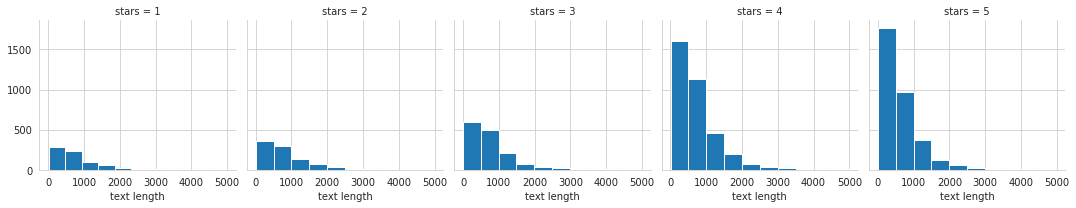

In [12]:
sns.set_style('whitegrid')
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length');

Create a boxplot of text length for each star category.

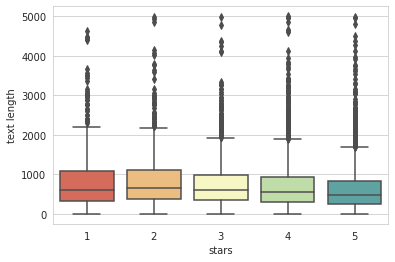

In [13]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='Spectral');

Create a countplot of the number of occurrences for each type of star rating.

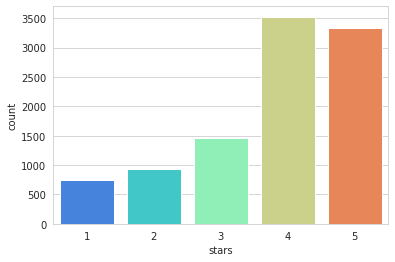

In [14]:
sns.countplot(x='stars',data=yelp,palette='rainbow');

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [15]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Use the corr() method on that groupby dataframe:

In [16]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


Then use seaborn to create a heatmap based off that .corr() dataframe:

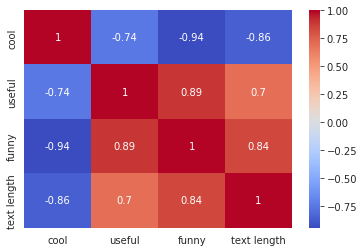

In [17]:
sns.heatmap(stars.corr(), cmap='coolwarm',annot=True)

###**NLP Classification Task**

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.


In [18]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


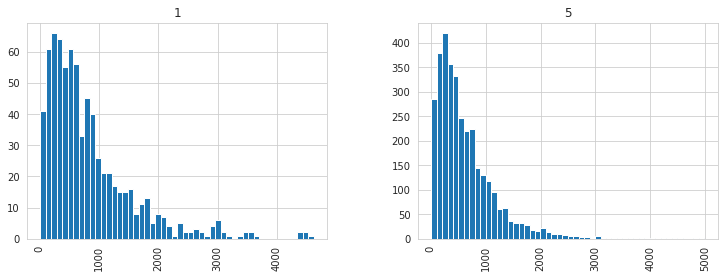

In [19]:
yelp_class.hist(column='text length', by='stars', bins=50,figsize=(12,4));

Through just basic data visualization we've been able to discover a trend that one star reviews messages tend to have more characters. 

In [20]:
# Get all the one star and five star reviews
one_star = yelp_class[yelp_class.stars == 1]
five_star = yelp_class[yelp_class.stars== 5]
# Create numpy list to visualize using wordcloud
one_star_text = " ".join(one_star.text.to_numpy().tolist())
five_star_text = " ".join(five_star.text.to_numpy().tolist())

###**Word Cloud**

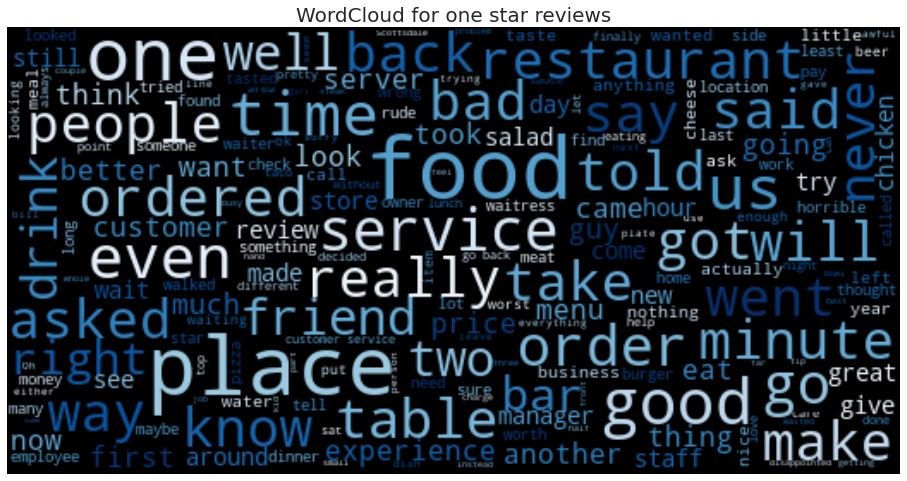

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of ham messages
one_star_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(one_star_text)
plt.figure(figsize=(16,10))
plt.imshow(one_star_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for one star reviews", fontsize = 20)
plt.show()

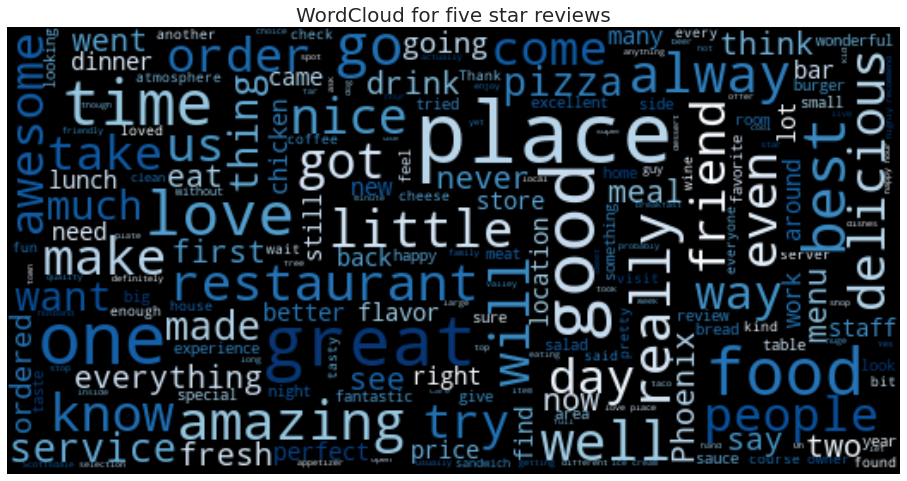

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# wordcloud of ham messages
five_star_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(five_star_text)
plt.figure(figsize=(16,10))
plt.imshow(five_star_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("WordCloud for five star reviews", fontsize = 20)
plt.show()

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Our features and target/labels)**

In [23]:
X = yelp_class['text']
y = yelp_class['stars']

Import CountVectorizer and create a CountVectorizer object.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [25]:
X = cv.fit_transform(X)

###**Train Test Split**

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

###**Training a Model**

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb and fit it using the training data. **


In [27]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

###**Predictions and Evaluations**

Time to see how our model did!

Use the predict method off of nb to predict labels from X_test. 

Then create a confusion matrix and classification report using these predictions and y_test.


In [28]:
predictions = nb.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[159  69]
 [ 22 976]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.

###**Using Text Processing**

** Import TfidfTransformer from sklearn. **

** Import Pipeline from sklearn. **

** Then create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**




In [29]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

###**Using the Pipeline**

Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text

###**Train Test Split**

Redo the train test split on the yelp_class object.

Then fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels


In [30]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

###**Predictions and Evaluation**

** Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**


In [31]:
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[  0 228]
 [  0 998]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Looks like Tf-Idf actually made things worse! That is it for this project. But there is still a lot more you can play with:

Some other things to try.... Try going back and playing around with the pipeline steps and seeing if creating a custom analyzer like text_process function helps (note: it probably won't). Or recreate the pipeline with just the CountVectorizer() and NaiveBayes. Does changing the ML model at the end to another classifier help at all?


###**Changing to custom made CountVectorizer Analyzer**

In [32]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[  0 228]
 [  0 998]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Adding stemming to our text_process function**

Stemming: Take roots of the word 

In [34]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
          
    # Now just remove any stopwords
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[  0 228]
 [  0 998]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###**Without both Stemmer and TF-IDF**

In [36]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
          
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[143  85]
 [ 11 987]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



**Without TF-IDF but Stemmer included**

In [38]:
# Natural Language Tool Kit
import nltk
import string
string.punctuation
# to remove stopword
# download stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
# for Stemming propose
from nltk.stem.porter import PorterStemmer

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
          
    # Now just remove any stopwords
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[163  65]
 [ 24 974]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.71      0.79       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.93      0.93      0.92      1226



Both Precision and F1-score improved by removing TF-IDF but including Stemmer.  

##**Natural Language Processing on Balanced Unbiased Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


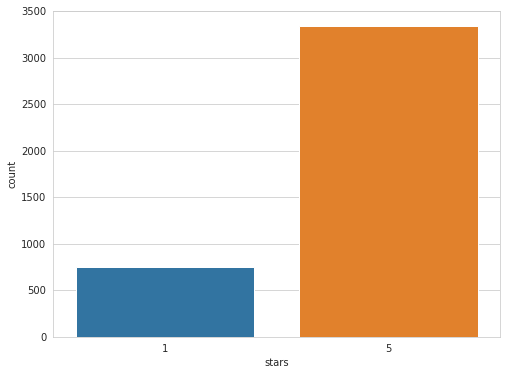

In [40]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(yelp_class.stars);

In [41]:
# Percentage of one star
(len(one_star)/len(five_star))*100 # 22.45%

22.445310158825293

In [42]:
# one way to fix it is to downsample the ham msg
five_star_df = five_star.sample(n = len(one_star), random_state = 44)
one_star_df = one_star
print(one_star_df.shape, five_star_df.shape)

(749, 11) (749, 11)


Below chart shows a similar distribution across message types after accounting for the imbalanced data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


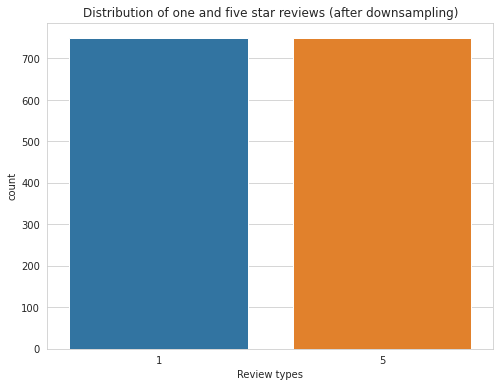

In [43]:
# Create a dataframe with these ham and spam msg
review_df = one_star_df.append(five_star_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(review_df.stars)
plt.title('Distribution of one and five star reviews (after downsampling)')
plt.xlabel('Review types');

###**Feeding balanced unbiased data into the Pipeline**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = review_df['text']
y = review_df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[210  14]
 [ 35 191]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.94      0.90       224
           5       0.93      0.85      0.89       226

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



The problem is resolved even after adding TF-IDF. Let's try again by removing it from the Pipeline.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
X = review_df['text']
y = review_df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)
# May take some time
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:' '\n', confusion_matrix(y_test,predictions))
print('\n', '\n','Classification Report:' '\n',classification_report(y_test,predictions))

Confusion Matrix:
 [[206  18]
 [ 27 199]]

 
 Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.92      0.90       224
           5       0.92      0.88      0.90       226

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



Both precision and F1 score of one star reviews are greatly improved by downsizing the five star reviews. Always remember, an unbalanced dataset will bias the prediction model towards the more common class!